


## Introduction
With the advancement of technology in the movie industry, recommender systems have become one of the best tools used to market movies to different users by connecting them to various genres of films with characteristic features that match the users' preferences.
## Problem Statement:

Develop a movie recommendation system that offers personalized top 5 movie recommendations to users based on their ratings of other movies.


## Objectives:
1. The system aims to enhance user engagement and satisfaction by providing tailored movie suggestions that align with their preferences
2. To create a recommendation system that utilizes collaborative filtering to analyze user ratings,
3. Identify similar users
4. Generate accurate movie recommendations for each user.


In [186]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [213]:
!pip install surprise

  Obtaining dependency information for surprise from https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl.metadata
  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [101 lines of output]
  C:\Users\Lenovo\AppData\Local\Temp\pip-install-r_kn0nvr\scikit-surprise_70c06209b3e44160a603fb7161230e48\setup.py:65: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.Distribution().fetch_build_eggs(["numpy>=1.17.3"])
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\b

## DATA UNDERSTANDING

In [187]:
# loading the different datasets
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [93]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [95]:
links= pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [96]:
#Understanding the shape of the different data sets
ratings_shape = ratings.shape
movies_shape = movies.shape
tags_shape = tags.shape
links_shape= links.shape
print('ratingshape:', ratings.shape)
print('moviesshape:', movies.shape)
print('tagsshape:', tags.shape)
print ('linksshape:', links.shape)

ratingshape: (100836, 4)
moviesshape: (9742, 3)
tagsshape: (3683, 4)
linksshape: (9742, 3)


In [97]:
# Let's find the number of unique users and movies in the ratings dataset
unq_users = ratings.userId.nunique()
unq_movies = ratings.movieId.nunique()
print(f'Unique users: {unq_users}')
print(f'Unique movies: {unq_movies}')

Unique users: 610
Unique movies: 9724


In [98]:
ratings.info ()
movies. info ()
tags. info ()
links. info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-nul

In [99]:
# Merging the ratings and movies data sets
merged_df = pd.merge(ratings,movies, on='movieId', how='inner')

merged_df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [100]:
#checking for missing values
merged_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [101]:
#statistical summary of the data
merged_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [102]:
#checking for duplicates
merged_df.duplicated().sum()

0

In [103]:
#checking for the number if rows and columns
merged_df.shape

(100836, 6)

In [104]:
#checking the data type
merged_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object

In [105]:
#checking for the overview of the data
merged_df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [106]:
#Checking for null values
merged_df.isnull(). sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

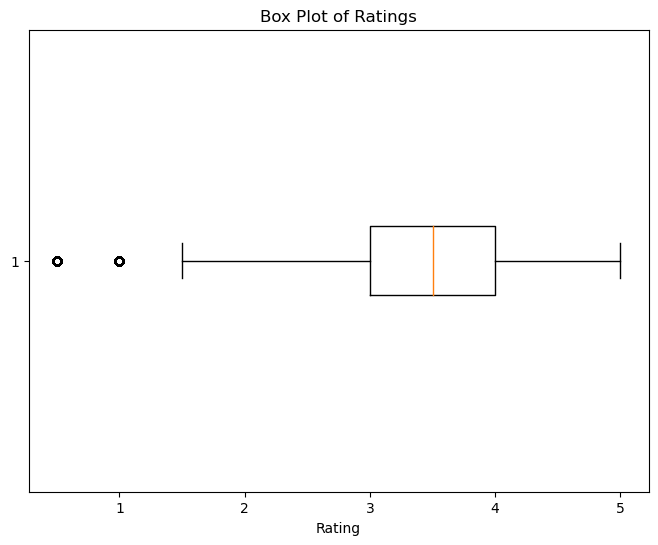

Summary Statistics:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Outliers:
        userId  movieId  rating   timestamp  \
26          76        1     0.5  1439165548   
235        217        3     1.0   955944713   
242        294        3     1.0   966596854   
245        308        3     0.5  1421374465   
260        552        3     1.0  1111472953   
...        ...      ...     ...         ...   
100530     605    35347     1.0  1277096832   
100684     610     8840     1.0  1479542247   
100722     610    61818     0.5  1493848943   
100734     610    72424     0.5  1493849030   
100823     610   145951     0.5  1493849019   

                                         title  \
26                            Toy Story (1995)   
235                    Grumpier Old Men (1995)   
242                    Grumpier Old Men (

In [107]:
# Calculate IQR and bounds
q1 = merged_df['rating'].quantile(0.25)
q3 = merged_df['rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = merged_df[(merged_df['rating'] < lower_bound) | (merged_df['rating'] > upper_bound)]

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['rating'], vert=False)
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()
# Print summary statistics and outliers
print("Summary Statistics:")
print(merged_df['rating'].describe())
print("\nOutliers:")
print(outliers)

The median rating is around 3. There are more ratings that are lower than 3 than there are ratings that are higher than 3. There are a few outliers that are both higher and lower than the rest of the ratings.

## EXPLORATORY DATA ANALYSIS

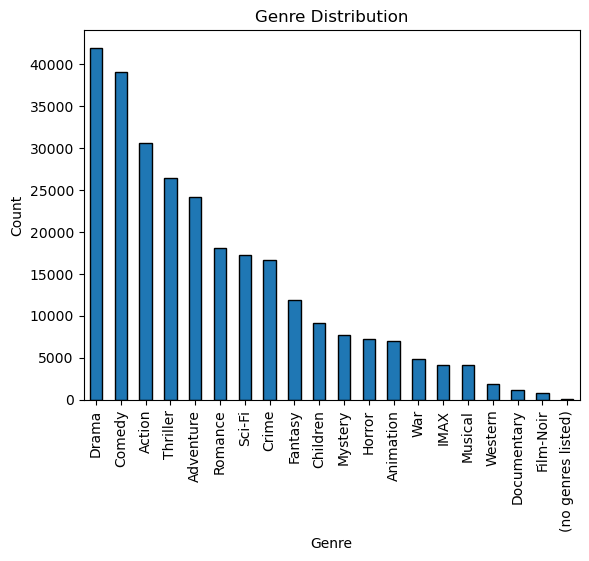

In [108]:
# Split genres into a list
merged_df['genres_list'] = merged_df['genres'].str.split('|')

# Count the occurrences of each genre
genre_counts = merged_df['genres_list'].explode().value_counts()

# Plot the genre counts
genre_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

Exploring the distrubution of rating


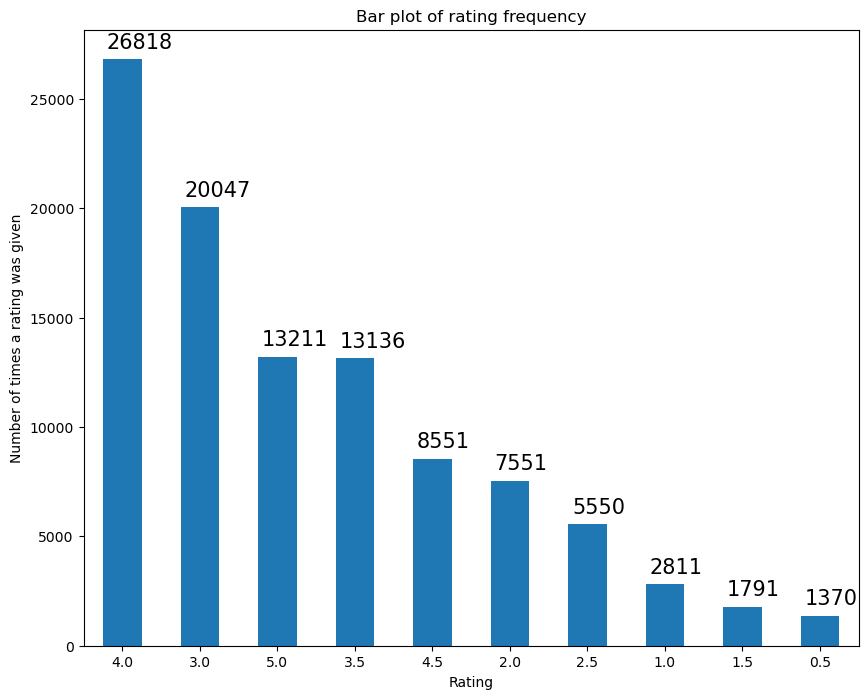

In [109]:
import matplotlib.pyplot as plt

# Plotting the bar plot
merged_df['rating'].value_counts(sort=True).plot(kind='bar', figsize=(10,8), use_index=True, rot=0)

# Adding title and labels
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')

# Adding annotations
label = list(merged_df['rating'].value_counts(sort=True))
ratings = list(merged_df['rating'].value_counts(sort=True).index)
for i in range(len(label)):
    plt.text(x = i - 0.2, y = label[i] + 500, s = label[i], size = 15)

# Show the plot
plt.show()


In [110]:
rating_count_df = pd.DataFrame(merged_df.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


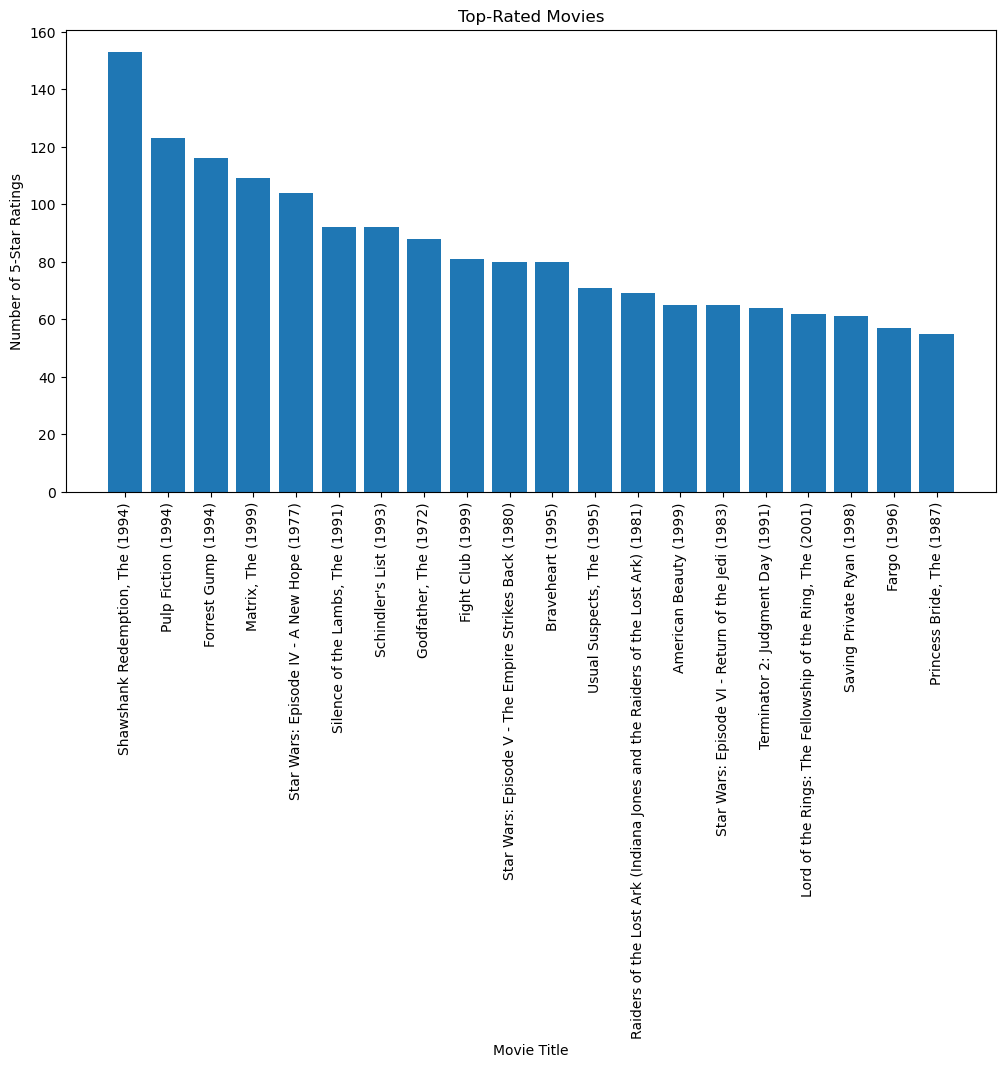

In [111]:
# Grouping by movie title and counting 5-star ratings
movie_ratings = merged_df[merged_df['rating'] == 5].groupby('title')['rating'].count().reset_index()

# Sorting movies based on the number of 5-star ratings
top_rated_movies = movie_ratings.sort_values(by='rating', ascending=False)

# Bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['title'][:20], top_rated_movies['rating'][:20])
plt.xlabel('Movie Title')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top-Rated Movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for legibility
plt.show()

The most rated movie is 'Forrest Gump (1994)' with movieId 356 and an average rating of 4.16


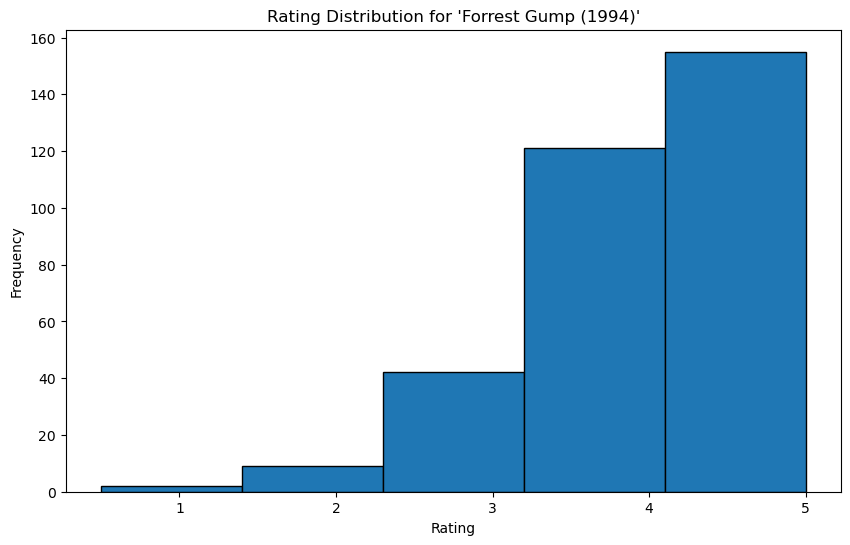

In [112]:
#Get the movie that is rated the most
most_rated_movie = merged_df['movieId'].value_counts().idxmax()
most_rated_movie_title =merged_df.loc[merged_df['movieId'] == most_rated_movie, 'title'].iloc[0]
most_rated_movie_rating = merged_df.loc[merged_df['movieId'] == most_rated_movie, 'rating'].mean()

print(f"The most rated movie is '{most_rated_movie_title}' with movieId {most_rated_movie} "
      f"and an average rating of {most_rated_movie_rating:.2f}")
# Plot the ratings for the most rated movie
plt.figure(figsize=(10, 6))
plt.hist(merged_df.loc[merged_df['movieId'] == most_rated_movie, 'rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f"Rating Distribution for '{most_rated_movie_title}'")
plt.show()

The most rated movie is 'Forrest Gump (1994)' with movieId 356 and an average rating of 4.16
The most rated movie is 'Shawshank Redemption, The (1994)' with movieId 318 and an average rating of 4.43
The most rated movie is 'Pulp Fiction (1994)' with movieId 296 and an average rating of 4.20
The most rated movie is 'Silence of the Lambs, The (1991)' with movieId 593 and an average rating of 4.16
The most rated movie is 'Matrix, The (1999)' with movieId 2571 and an average rating of 4.19


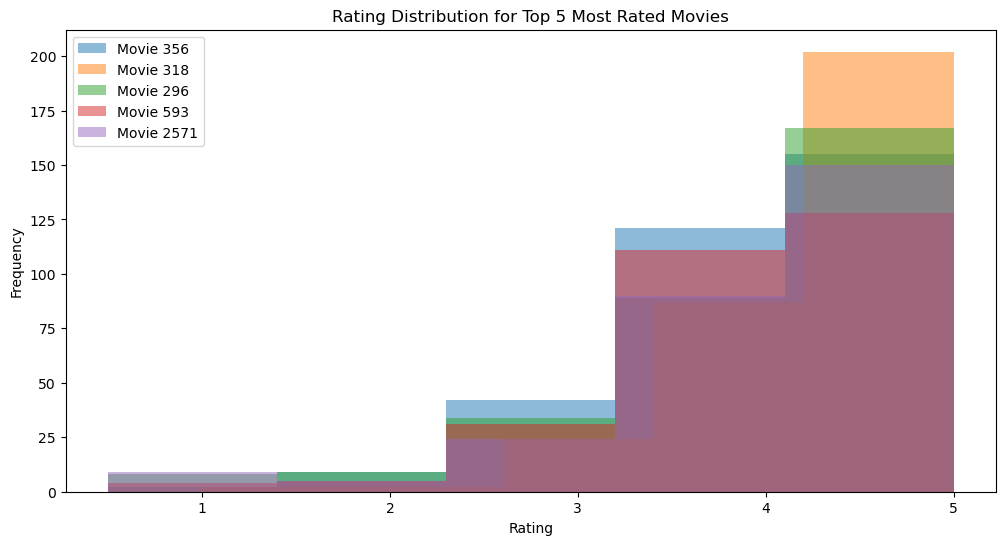

In [113]:
top_rated_movies =  merged_df['movieId'].value_counts().head(5).index

for movie_id in top_rated_movies:
    movie_title =  merged_df.loc[ merged_df['movieId'] == movie_id, 'title'].iloc[0]
    movie_rating =  merged_df.loc[ merged_df['movieId'] == movie_id, 'rating'].mean()
    print(f"The most rated movie is '{movie_title}' with movieId {movie_id} "
          f"and an average rating of {movie_rating:.2f}")
# Plot the ratings for the top 5 most rated movies
plt.figure(figsize=(12, 6))
for movie_id in top_rated_movies:
    ratings =  merged_df.loc[ merged_df['movieId'] == movie_id, 'rating']
    plt.hist(ratings, bins=5, alpha=0.5, label=f'Movie {movie_id}')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Top 5 Most Rated Movies')
plt.legend()
plt.show()

In [46]:
# Let's now explore the lowly rated movies

# Movies with a rating of 1
low_rated_movies = merged_df[merged_df['rating'] <= 1]

# Grouping by movie title and counting the number of 1-star ratings
movie_ratings_count = low_rated_movies['title'].value_counts().reset_index()
movie_ratings_count.columns = ['Title', 'Number of low Ratings']

# Sorting the movies by the number of 1-star ratings in descending order
top_low_rated_movies = movie_ratings_count.sort_values(by='Number of low Ratings', ascending=False)

# Bar plot for the top low-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_low_rated_movies['Title'][:10], top_low_rated_movies['Number of low Ratings'][:10])
plt.xlabel('Movie Title')
plt.ylabel('Number of low Ratings')
plt.title('Low rated movies')
plt.xticks(rotation=90)
plt.show()

NameError: name 'merged_df' is not defined

# Univariate and bivariate analysis

In [ ]:
# Univariate Analysis
plt.figure(figsize=(12, 6))

# Rating Distribution
plt.subplot(2, 2, 1)
plt.hist(merged_df['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')


# Genre Distribution
plt.subplot(2, 2, 3)
genres = merged_df['genres'].str.get_dummies().sum().sort_values(ascending=False)
genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')

# User Ratings Count
plt.subplot(2, 2, 4)
user_ratings_count =merged_df['userId'].value_counts()
plt.bar(user_ratings_count.index, user_ratings_count.values)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per User')

plt.tight_layout()
plt.show()


In [2]:
# Get the top 20 user IDs
top_20_users = merged_df['userId'].value_counts().head(20).index

# Filter the dataframe for the top 20 users
df_top_20_users = merged_df[merged_df['userId'].isin(top_20_users)]

# Split genres into a list
genres = df_top_20_users['genres'].str.split('|', expand=True)

# Concatenate the genres with the ratings and user ID
df_genres = pd.concat([df_top_20_users[['userId', 'rating']], genres], axis=1)
# Melt the dataframe to have a single genre column
df_genres_melted = pd.melt(df_genres, id_vars=['userId', 'rating'], value_vars=[0, 1, 2, 3, 4])
df_genres_melted.columns = ['userId', 'rating', 'genre_num', 'genre']

# Calculate the average rating per user for each genre
average_rating_per_user_genre = df_genres_melted.groupby(['userId', 'genre'])['rating'].mean().unstack()
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(average_rating_per_user_genre, cmap='viridis', annot=True, fmt='.2f')
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.title('Average Rating per User for Each Genre (Top 20 Users)')
plt.show()

NameError: name 'merged_df' is not defined

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. In the context of a heatmap showing the average rating per user for each genre, here's how you can interpret it:

Color Intensity: The intensity of the color represents the average rating given by a user for a particular genre. A darker color indicates a higher rating, while a lighter color indicates a lower rating Genres: The rows of the heatmap represent the different users, and the columns represent the different genres. Each cell in the heatmap corresponds to a specific user and genre combination.

Average Ratings: By looking at the heatmap, you can quickly identify which genres each user tends to rate higher or lower. For example, if a user consistently gives high ratings for Action movies (dark color in the "Action" column), you can infer that the user enjoys Action movies. Comparison: Heatmaps can also help you compare the rating patterns of different users across genres. You can identify similarities or differences in their preferences based on the color patterns in the heatmap.

Overall, heatmaps provide a visual representation of the data that allows for easy interpretation and comparison of values across different categories.

## MODELLING

### Train Test Slpit
Helps evaluate model perfomance.

In [3]:
#Conducting a train test split on the data
X_train, X_test = train_test_split(merged_df, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

NameError: name 'train_test_split' is not defined

In [4]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

NameError: name 'X_train' is not defined

### Creating a copy of train and test dataset
These datasets will be used for prediction and evaluation.

Dummy train will be used later for prediction of the movies which has not been rated by the user.

-To ignore the movies rated by the user,we will mark it as 0 during prediction.
-The movies not rated by user is marked as 1 for prediction.
Dummy test will be used for evaluation.

-To evaluate, we will only make prediction on the movies rated by the user.
-So, this is marked as 1. This is just opposite of dummy_train

In [5]:
# Making a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

'''
# Lambda function is applied to the the rating column in both dummy_train and
dummy_test
'''
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

NameError: name 'X_train' is not defined

In [6]:
# The movies not rated by user is marked as 1 for prediction
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

NameError: name 'dummy_train' is not defined

In [7]:
dummy_train.head()

NameError: name 'dummy_train' is not defined

In [8]:
dummy_test.head()

NameError: name 'dummy_test' is not defined

### User-User Similarity matrix
-This matrix captures the similarity between users based on their movie ratings in the user_data.

-It's a square matrix with dimensions (number_of_users, number_of_users).

-Each row represents a user, and each column represents another user.

Using Cosine similarity

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

NameError: name 'user_data' is not defined

### Cosine Similarity:
Values range from 0 to 1.

1: Identical movie ratings (most similar).
0: No movies rated in common or completely opposite ratings (least similar).
Values closer to 1 indicate higher similarity.
### Output:
The printed output displays the User Similarity Matrix. Each row represents a user, and each column represents another user. The value at a specific row (user) and column (another user) intersection shows their similarity score.

### Short Note:
User Similarity Matrix using Cosine Similarity. Values: 0 (least similar) to 1 (most similar) based on movie ratings. Used for User-Based Collaborative Filtering for movie recommendations.

## Predicting the User ratings on the movies

In [ ]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

user_predicted_ratings, represents the predicted movie ratings for all users in the dataset.

### Understanding the Matrix:
It's a 2D array with the same number of rows as users and the same number of columns as movies.
Each row represents a user, and each column represents a movie.
The value at a specific row (user) and column (movie) intersection indicates the predicted rating for that user on that movie.
### Calculation Method:
The code snippet we provided (user_predicted_ratings = np.dot(user_similarity, user_data)) performs matrix multiplication between the User Similarity Matrix (user_similarity) and the user-movie matrix (user_data).
### Interpretation of Values:
The values in user_predicted_ratings represent the predicted ratings on a scale that likely reflects the original rating scale (e.g., 1 to 5 stars).

Higher values indicate movies the user is predicted to enjoy more (higher predicted ratings).

Lower values suggest movies the user might not like as much (lower predicted ratings).

In [ ]:
# Getting the shape of the user_predicted_ratings
user_predicted_ratings.shape

We do not want to recommend the same movie that the user already watched. We are interested only in the movies not rated by the user, we will ignore the movies rated by the user.

This is where we will use our dummy train matrix that we previously built.

In [ ]:
# np.multiply for cell-by-cell multiplication

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

Interpreting user_final_ratings in Short Notes:

## Purpose:
Isolates predicted ratings for movies still needing predictions (not rated by the user).

## Creation:
Element-wise multiplication of user_predicted_ratings and dummy_train matrices.

## Structure:
Same dimensions as user_predicted_ratings (users x movies). Values are 0 for movies the user has already rated (based on dummy_train). Values reflect predicted ratings for unrated movies.

## Key Points:
Zeros for rated movies simplify model evaluation and recommendation. Non-zero values guide recommendations for unrated movies. The values reflecting the similarity score the higher the score the more the users are.eg. user 4 and user 1 on movie id 1 have a 52% similarity


Next Steps: Recommend movies with high predicted ratings to the user.

## Top 5 movie recommendations for the (User 42)

In [ ]:
#retrieving the top five movie recommendations
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

## Item-based collaborative filtering

In [ ]:
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

### Data Pivoting:
It assumes you have a DataFrame X_train containing user-movie ratings data with columns like userId, movieId, and rating.

The code uses the pivot function on X_train to create a new DataFrame called movie_features.

In movie_features, Rows represent movie IDs (movieId). Columns represent user IDs (userId). Values represent the ratings (numerical values) provided by each user for each movie.

Movie_features represents a user-movie matrix suitable for item-based collaborative filtering.

Each cell in the matrix shows a user's rating (or 0 if not rated) for a specific movie.

## Item-Item Similarity matrix¶
Using Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

This code calculates the Item-Item Similarity Matrix using cosine similarity. It represents the similarity between each pair of movies in your data.

-The output shows a large square matrix (dimensions: (number_of_movies, number_of_movies)).
-Each value (item_similarity[i, j]) represents the cosine similarity between movie i and movie j.
-Values close to 1 indicate highly similar movies (sharing similar features).
-Values closer to 0 suggest less similarity.
This matrix captures how similar movies are based on their features. It's used for item-based collaborative filtering, where similar movies are recommended to users who liked other similar movies.

## Predicting the User ratings on the movies

In [ ]:
#getting user rating based on familiarity
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

### Matrix Multiplication:
It uses np.dot(movie_features.T, item_similarity) to perform matrix multiplication.

movie_features.T represents the transposed user-movie matrix (users as rows, movies as columns).

item_similarity is the item-item similarity matrix calculated earlier.

### Predicted Ratings:
The resulting matrix item_predicted_ratings stores the predicted ratings for each user-movie combination.

### Output Interpretation:
item_predicted_ratings is a large 2D matrix with the same dimensions as movie_features (users x movies). Each element item_predicted_ratings[i, j] represents the predicted rating for user i on movie j. The predicted ratings are calculated based on the user's ratings for similar movies and the item-item similarities. High values in the matrix indicate a higher predicted rating (user might enjoy the movie). Low values suggest a lower predicted rating (user might not enjoy the movie as much).

In [10]:
item_predicted_ratings.shape

NameError: name 'item_predicted_ratings' is not defined

### Filtering the ratings only for the movies not already rated by the user for recommendation

In [11]:
# np.multiply for cell-by-cell multiplication
# This code snippet focuses on filtering the predicted ratings (item_predicted_ratings)
# to identify movies a user might enjoy but hasn't already rated (recommendations).
item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

NameError: name 'np' is not defined

### Cell-by-Cell Multiplication:
It uses np.multiply(item_predicted_ratings, dummy_train) to perform element-wise multiplication between two matrices. item_predicted_ratings contains the predicted ratings for all user-movie combinations.

### dummy_train Matrix:
This matrix (assumed to be named dummy_train) likely contains 1s for movies the user has already rated and 0s for unrated movies. It's crucial to ensure dummy_train has the same dimensions (users x movies) as item_predicted_ratings.

### Filtering Effect:
The multiplication essentially sets the predicted ratings for already rated movies (where dummy_train has a 1) to 0. This effectively filters out movies the user has already interacted with, leaving only predicted ratings for unrated movies.

### Output (item_final_ratings):
This matrix now holds the predicted ratings for movies the user hasn't rated. You can use this matrix for recommendation purposes

## Top 5 movie recommendations for the User 42

In [12]:
item_final_ratings.iloc[42].sort_values(ascending = False)[0:6]

NameError: name 'item_final_ratings' is not defined

## Evaluation
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the User instead of predicting it for the movie not rated by the user.

In [13]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)

print(test_user_similarity.shape)

NameError: name 'X_test' is not defined

User-Movie Matrix:

It pivots a DataFrame with user-movie ratings (X_test) to create a user-movie matrix test_user_features suitable for user-based collaborative filtering.

Rows represent users, columns represent movies, and values are ratings (filled with 0 for missing ones).

User Similarity:

It uses cosine_similarity to calculate the similarity between users based on their ratings in test_user_features. This measures how closely two users' tastes align. Missing values (NaNs) are replaced with 0.

Output:

test_user_similarity is a square matrix (dimensions: (number_of_users, number_of_users)). Each value (test_user_similarity[i, j]) represents the cosine similarity between user i and user j.

Interpretation:

Values closer to 1 indicate highly similar users (sharing similar movie preferences). Values closer to 0 suggest less similarity. This matrix can be used for user-based collaborative filtering, where movies are recommended to a user based on the preferences of other similar users.

In [14]:
# Calculate Predicted Ratings for Users in the Test Set using
# User-Based Collaborative Filtering
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

NameError: name 'np' is not defined

Matrix Multiplication:

It performs matrix multiplication using np.dot(test_user_similarity, test_user_features). test_user_similarity is the user-user similarity matrix you calculated earlier. test_user_features is the user-movie matrix containing user ratings.

Predicted Ratings:

The resulting matrix user_predicted_ratings_test stores the predicted ratings for each user-movie combination in the test set.

Output Interpretation:

user_predicted_ratings_test is a 2D matrix with the same dimensions as test_user_features (users x movies). Each element user_predicted_ratings_test[i, j] represents the predicted rating for user i on movie j. The predicted ratings are calculated based on the ratings of similar users (from test_user_similarity) and the movies they have rated (in test_user_features).

## Testing on the movies already rated by the user

In [15]:
# aims to filter the predicted ratings (user_predicted_ratings_test) to focus
#  on movies the user in the test set hasn't already rated.
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

NameError: name 'np' is not defined

Cell-by-Cell Multiplication:

It uses np.multiply(user_predicted_ratings_test, dummy_test) to perform element-wise multiplication between two matrices.
user_predicted_ratings_test contains the predicted ratings for all user-movie combinations in the test set.

dummy_test Matrix:

This matrix (assumed to be named dummy_test) likely contains 1s for movies the user has already rated and 0s for unrated movies.
It's crucial to ensure dummy_test has the same dimensions (users x movies) as user_predicted_ratings_test.

Filtering Effect:

The multiplication essentially sets the predicted ratings for already rated movies (where dummy_test has a 1) to 0.
This effectively removes movies the user has already interacted with, leaving only predicted ratings for unrated movies.

Output (test_user_final_rating):

This matrix now holds the predicted ratings for movies the user in the test set hasn't rated.
However, the output size might be misleading.

In [16]:
merged_df['rating'].describe()

NameError: name 'merged_df' is not defined

We need to normalize the final rating values between range (0.5, 5)(unlike a typical 1-5 star rating).

In [17]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for normalization

# Copy the test_user_final_rating matrix to avoid modifying the original data
X = test_user_final_rating.copy()

# Filter out zero values (user hasn't rated the movie) before normalization
# Keep only non-zero values (predicted ratings for unrated movies)
X = X[X > 0]

# Create a MinMaxScaler object, specifying the desired output range (0.5 to 5)
scaler = MinMaxScaler(feature_range=(0.5, 5))

# Fit the scaler to the data (learn scaling parameters based on the filtered ratings)
scaler.fit(X)

# Apply the normalization transformation to the filtered data
pred = scaler.transform(X)

# Print the normalized predicted ratings
print("Normalized Predicted Ratings (0.5 to 5):")
print(pred)

NameError: name 'test_user_final_rating' is not defined

The printed output (pred) now contains the normalized predicted ratings for unrated movies, scaled to the range of 0.5 to 5

In [18]:
# calculates the total number of non-NaN values in the normalized pred
total_non_nan = np.count_nonzero(~np.isnan(pred))

total_non_nan

NameError: name 'np' is not defined

In [19]:
# Data transformation - result == user-movie matrix
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

NameError: name 'X_test' is not defined

In [20]:
# RMSE Score

# Calculate squared differences between actual and predicted ratings
diff_sqr_matrix = (test - pred) ** 2

# Sum the squared errors across all users and movies (ignoring NaNs)
sum_of_squares_err = diff_sqr_matrix.sum().sum()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(sum_of_squares_err / total_non_nan)

# Print the RMSE score
print("RMSE:", rmse)


NameError: name 'test' is not defined

## Explanation:
### Squared Differences:
diff_sqr_matrix = (test - pred) ** 2 calculates the element-wise squared difference between the actual ratings (test) and the predicted ratings (pred). Squaring ensures positive values for both positive and negative errors.

### Sum of Squared Errors (SSE):

sum_of_squares_err = diff_sqr_matrix.sum().sum() computes the total sum of squared errors across all users and movies. sum() applied twice sums the elements first across each row (for each user) and then across all columns (to get the total error). By default, sum() ignores NaN values (missing data points).

### RMSE Calculation:

rmse = np.sqrt(sum_of_squares_err / total_non_nan) calculates the Root Mean Squared Error (RMSE). It takes the square root of the average squared error (sum_of_squares_err / total_non_nan). total_non_nan (assumed to be calculated earlier) represents the total number of valid non-NaN values in the pred matrix.

### Interpretation:

The printed RMSE score represents the average magnitude of the errors between the actual ratings and the predicted ratings in your user-based collaborative filtering model. Lower RMSE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings.

In [21]:

# Mean abslute error

# Calculate absolute differences between actual and predicted ratings
abs_diff_matrix = np.abs(pred - test)

# Sum the absolute errors across all users and movies (ignoring NaNs)
sum_of_absolute_errors = abs_diff_matrix.sum().sum()

# Calculate MAE (Mean Absolute Error)
mae = sum_of_absolute_errors / total_non_nan

# Print the MAE score
print("MAE:", mae)

NameError: name 'np' is not defined

## Explanation:
### Absolute Differences:
abs_diff_matrix = np.abs(pred - test) calculates the element-wise absolute difference between the actual ratings (test) and the predicted ratings (pred). np.abs ensures positive values for all differences.

### Sum of Absolute Errors (SAE):

sum_of_absolute_errors = abs_diff_matrix.sum().sum() computes the total sum of absolute errors across all users and movies.

Similar to the RMSE calculation, sum() is applied twice to sum absolute errors for each user (row-wise) and then across all users (column-wise). By default, sum() ignores NaN values (missing data points).

### MAE Calculation:

mae = sum_of_absolute_errors / total_non_nan calculates the Mean Absolute Error (MAE).

It divides the total SAE (sum_of_absolute_errors) by the number of valid non-NaN values in pred (total_non_nan).

This provides the average absolute difference between actual and predicted ratings.

### Interpretation:

The printed MAE score (1.202588 in your case) represents the average absolute error between actual ratings and predicted ratings in your collaborative filtering model.

Lower MAE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings on average.

### Comparison with RMSE:

RMSE squares the errors before averaging, giving more weight to larger errors. MAE uses absolute differences, treating all errors equally.

It means that on an average our User-based recommendation engine is making an error of 1.2 in predicting the User ratings.

Using Item-Item Similarity

In [22]:
# Item-Based Collaborative Filtering

# Create Item-User Rating Matrix (fill missing ratings with 0)
test_item_features = X_test.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# Calculate Item-Item Similarity Matrix using Cosine Similarity
test_item_similarity = cosine_similarity(test_item_features)

# Replace NaN values in the similarity matrix with 0 (for better handling)
test_item_similarity[np.isnan(test_item_similarity)] = 0

# Print the Item-Item Similarity Matrix
print("\nItem-Item Similarity Matrix:")
print(test_item_similarity)
print("-" * 10)
print(f"Shape of the matrix: {test_item_similarity.shape}")

NameError: name 'X_test' is not defined

## Explanation:
### Item-User Matrix:
test_item_features = X_test.pivot(...) creates an item-user matrix from X_test (assumed to be your user-movie rating data). This pivots the data such that rows represent movies (items) and columns represent users. fillna(0) fills missing ratings (where a user hasn't rated a movie) with 0.

### Item-Item Similarity:

test_item_similarity = cosine_similarity(test_item_features) calculates the cosine similarity between items (movies) based on user ratings. Since the data is now in an item-user format, cosine similarity captures how similar movies are based on how users have rated them. Higher cosine similarity indicates movies are rated similarly by users (suggesting they might be relevant to similar user tastes).

### Handling NaN Values:

test_item_similarity[np.isnan(test_item_similarity)] = 0 replaces any NaN values in the similarity matrix with 0. This might be done for better handling during calculations in item-based collaborative filtering.

### Output:

The code prints the resulting test_item_similarity matrix. It also prints the shape of the matrix using .shape.

### Interpretation:

The printed test_item_similarity matrix shows the cosine similarity between each pair of movies.

A value closer to 1 indicates high similarity (users tend to rate these movies similarly). A value closer to 0 suggests lower similarity (users' ratings diverge for these movies). The shape (test_item_similarity.shape) tells you the dimensions of the matrix (number of movies x number of movies).

In [23]:
# Item-Based Collaborative Filtering - Predicted Ratings

# Calculate Predicted Ratings using Item-Item Similarity
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity)
item_predicted_ratings_test

NameError: name 'np' is not defined

## Interpretation:
The resulting item_predicted_ratings_test matrix contains predicted ratings for users based on item-based collaborative filtering. Each element represents the predicted rating a user might give to a movie, considering how similar movies have been rated by that user and other users.

## Testing on the movies already rated by the user

In [24]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

NameError: name 'np' is not defined

In [25]:
merged_df['rating'].describe()

NameError: name 'merged_df' is not defined

We need to normalize the final rating values between range (0.5, 5)(unlike a typical 1-5 star rating).

In [26]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for normalization

# Copy the test_user_final_rating matrix to avoid modifying the original data
X = test_user_final_rating.copy()

# Filter out zero values (user hasn't rated the movie) before normalization
# Keep only non-zero values (predicted ratings for unrated movies)
X = X[X > 0]

# Create a MinMaxScaler object, specifying the desired output range (0.5 to 5)
scaler = MinMaxScaler(feature_range=(0.5, 5))

# Fit the scaler to the data (learn scaling parameters based on the filtered ratings)
scaler.fit(X)

# Apply the normalization transformation to the filtered data
pred = scaler.transform(X)

# Print the normalized predicted ratings
print("Normalized Predicted Ratings (0.5 to 5):")
print(pred)


NameError: name 'test_user_final_rating' is not defined

The printed output (pred) now contains the normalized predicted ratings for unrated movies, scaled to the range of 0.5 to 5

In [27]:
# calculates the total number of non-NaN values in the normalized pred
total_non_nan = np.count_nonzero(~np.isnan(pred))

total_non_nan

NameError: name 'np' is not defined

In [28]:
# Data transformation - result == user-movie matrix
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

NameError: name 'X_test' is not defined

In [29]:
# RMSE Score

# Calculate squared differences between actual and predicted ratings
diff_sqr_matrix = (test - pred) ** 2

# Sum the squared errors across all users and movies (ignoring NaNs)
sum_of_squares_err = diff_sqr_matrix.sum().sum()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(sum_of_squares_err / total_non_nan)

# Print the RMSE score
print("RMSE:", rmse)


NameError: name 'test' is not defined

## Explanation:¶
Squared Differences:
diff_sqr_matrix = (test - pred) ** 2 calculates the element-wise squared difference between the actual ratings (test) and the predicted ratings (pred). Squaring ensures positive values for both positive and negative errors.

Sum of Squared Errors (SSE):

sum_of_squares_err = diff_sqr_matrix.sum().sum() computes the total sum of squared errors across all users and movies. sum() applied twice sums the elements first across each row (for each user) and then across all columns (to get the total error). By default, sum() ignores NaN values (missing data points).

RMSE Calculation:

rmse = np.sqrt(sum_of_squares_err / total_non_nan) calculates the Root Mean Squared Error (RMSE). It takes the square root of the average squared error (sum_of_squares_err / total_non_nan). total_non_nan (assumed to be calculated earlier) represents the total number of valid non-NaN values in the pred matrix.

Interpretation:

The printed RMSE score represents the average magnitude of the errors between the actual ratings and the predicted ratings in your user-based collaborative filtering model. Lower RMSE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings.

In [30]:
# Mean abslute error

# Calculate absolute differences between actual and predicted ratings
abs_diff_matrix = np.abs(pred - test)

# Sum the absolute errors across all users and movies (ignoring NaNs)
sum_of_absolute_errors = abs_diff_matrix.sum().sum()

# Calculate MAE (Mean Absolute Error)
mae = sum_of_absolute_errors / total_non_nan

# Print the MAE score
print("MAE:", mae)

NameError: name 'np' is not defined

## Explanation:
Absolute Differences:
abs_diff_matrix = np.abs(pred - test) calculates the element-wise absolute difference between the actual ratings (test) and the predicted ratings (pred). np.abs ensures positive values for all differences.

Sum of Absolute Errors (SAE):

sum_of_absolute_errors = abs_diff_matrix.sum().sum() computes the total sum of absolute errors across all users and movies.

Similar to the RMSE calculation, sum() is applied twice to sum absolute errors for each user (row-wise) and then across all users (column-wise). By default, sum() ignores NaN values (missing data points).

MAE Calculation:

mae = sum_of_absolute_errors / total_non_nan calculates the Mean Absolute Error (MAE).

It divides the total SAE (sum_of_absolute_errors) by the number of valid non-NaN values in pred (total_non_nan).

This provides the average absolute difference between actual and predicted ratings.

Interpretation:

The printed MAE score (1.202588 in your case) represents the average absolute error between actual ratings and predicted ratings in your collaborative filtering model.

Lower MAE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings on average.

Comparison with RMSE:

RMSE squares the errors before averaging, giving more weight to larger errors. MAE uses absolute differences, treating all errors equally.

It means that on an average our User-based recommendation engine is making an error of 1.2 in predicting the User ratings.

## Using Item-Item Similarity

In [31]:
# Item-Based Collaborative Filtering

# Create Item-User Rating Matrix (fill missing ratings with 0)
test_item_features = X_test.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# Calculate Item-Item Similarity Matrix using Cosine Similarity
test_item_similarity = cosine_similarity(test_item_features)

# Replace NaN values in the similarity matrix with 0 (for better handling)
test_item_similarity[np.isnan(test_item_similarity)] = 0

# Print the Item-Item Similarity Matrix
print("\nItem-Item Similarity Matrix:")
print(test_item_similarity)
print("-" * 10)
print(f"Shape of the matrix: {test_item_similarity.shape}")

NameError: name 'X_test' is not defined

## Explanation:
Item-User Matrix:
test_item_features = X_test.pivot(...) creates an item-user matrix from X_test (assumed to be your user-movie rating data). This pivots the data such that rows represent movies (items) and columns represent users. fillna(0) fills missing ratings (where a user hasn't rated a movie) with 0.

Item-Item Similarity:

test_item_similarity = cosine_similarity(test_item_features) calculates the cosine similarity between items (movies) based on user ratings. Since the data is now in an item-user format, cosine similarity captures how similar movies are based on how users have rated them. Higher cosine similarity indicates movies are rated similarly by users (suggesting they might be relevant to similar user tastes).

Handling NaN Values:

test_item_similarity[np.isnan(test_item_similarity)] = 0 replaces any NaN values in the similarity matrix with 0. This might be done for better handling during calculations in item-based collaborative filtering.

Output:

The code prints the resulting test_item_similarity matrix. It also prints the shape of the matrix using .shape.

Interpretation:

The printed test_item_similarity matrix shows the cosine similarity between each pair of movies.

A value closer to 1 indicates high similarity (users tend to rate these movies similarly). A value closer to 0 suggests lower similarity (users' ratings diverge for these movies). The shape (test_item_similarity.shape) tells you the dimensions of the matrix (number of movies x number of movies).

In [32]:
# Item-Based Collaborative Filtering - Predicted Ratings

# Calculate Predicted Ratings using Item-Item Similarity
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity)
item_predicted_ratings_test

NameError: name 'np' is not defined

## Interpretation:
The resulting item_predicted_ratings_test matrix contains predicted ratings for users based on item-based collaborative filtering. Each element represents the predicted rating a user might give to a movie, considering how similar movies have been rated by that user and other users

## Testing on the movies already rated by the user

In [33]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

NameError: name 'np' is not defined

In [34]:
merged_df['rating'].describe()

NameError: name 'merged_df' is not defined

We need to normalize the final rating values between range (0.5, 5)(unlike a typical 1-5 star rating).

In [35]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy()
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

NameError: name 'test_item_final_rating' is not defined

In [36]:
# calculates the total number of non-NaN values in the normalized pred
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

NameError: name 'np' is not defined

In [37]:
# Data transformation - result == user-movie matrix
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

NameError: name 'X_test' is not defined

In [38]:
# Calculate squared differences between actual and predicted ratings
diff_sqr_matrix = (test - pred) ** 2

# Sum the squared errors across all users and movies (ignoring NaNs)
sum_of_squares_err = diff_sqr_matrix.sum().sum()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(sum_of_squares_err / total_non_nan)

# Print the RMSE score
print("RMSE:", rmse)


NameError: name 'test' is not defined

Interpretation of the RMSE Score:

RMSE: 2.519468076963487 indicates an average error of about 2.52 units on your rating scale between actual and predicted ratings in this particular model.

In [39]:

# Mean abslute error

# Calculate absolute differences between actual and predicted ratings
abs_diff_matrix = np.abs(pred - test)

# Sum the absolute errors across all users and movies (ignoring NaNs)
sum_of_absolute_errors = abs_diff_matrix.sum().sum()

# Calculate MAE (Mean Absolute Error)
mae = sum_of_absolute_errors / total_non_nan

# Print the MAE score
print("MAE:", mae)

NameError: name 'np' is not defined

MAE: 2.223498526064639 indicates an average absolute error of about 2.22 units on your rating scale between actual and predicted ratings. A lower MAE generally signifies better model performance.

It means that on an average our Item-based recommendation engine is making an error of 2.21 in predicting the User ratings.

## Conclusion
For the given dataset, the User-based collaborative filtering outperformed Item-based collaborative filtering.

## SVD MODEL
for Collaborative filtering


In this section, we're going to go with collaborative filtering method of modelling. This is because it is in the context of past behaviour. It is based on whether multiple users have the same tastes and preferences and makes recommendations from that as opposed to a content-based recommender whereby it recommends based on the similarity of items.

In [40]:
# Assuming 'userId' is the user ID column, 'movieId' is the movie ID column, and 'rating' is the rating column
user_id_col = 'userId'
movie_id_col = 'movieId'
rating_col = 'rating'

# Create the user-movie rating matrix using pivot_table
rating_matrix = pd.pivot_table(merged_df, values=rating_col, index=user_id_col, columns=movie_id_col, fill_value=0)

# Display a sample of the rating matrix
rating_matrix.head()

NameError: name 'pd' is not defined

Next is to denormalize the data and convert it into a numpy array

In [41]:
R = rating_matrix.values
ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - ratings_mean.reshape(-1, 1)
Ratings_demeaned
# With Ratings_demeaned the mean of each ratings can be removed to account for bias.

NameError: name 'rating_matrix' is not defined

### Model-Based Collaborative Filtering

This method is based on matrix factorization. It is an unsupervised machine learning method that is used in recommendation systems where it can deal with sparsity and scalability as opposed to the memory-based method.

In [42]:
!pip install pandas wordcloud matplotlib
!pip install surprise

In [43]:
from wordcloud import WordCloud

In [44]:
# Let's check the sparsity of the ratings dataset
sparsity = round(1.0 - len(ratings) / float(unq_users * unq_movies), 3)
print ('The sparsity level of this dataset is ' +  str(sparsity * 100) + '%')

NameError: name 'ratings' is not defined

In [ ]:
# Let's set up SVD to carry out dimensionality reduction on the 'Ratings_demeaned' matrix
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [ ]:
sigma = np.diag(sigma)

Let's make predictions. But before that can happen, we need to add all the individual mean of the ratings feature so as to get the actual ratings predictions.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + ratings_mean.reshape(-1, 1)
all_user_predicted_ratings

We thereafter need to create a dataframe from the predicted user ratings array

In [ ]:
print("Shape of all_user_predicted_ratings:", all_user_predicted_ratings.shape)
print("Expected shape based on columns:", len(ratings.columns))

In [ ]:
pred = pd.DataFrame(all_user_predicted_ratings, columns=rating_matrix.columns)
pred.head()

A function to come up with the most precise rating prediction on a movie the user has not rated. No features such as movie title or genre was used.

In [ ]:
ratings.head ()

In [ ]:
def recommend_movies(predictions, userId, movies, original_ratings, num_recommendations):
    # Get and sort the user's predictions
    user_row_number = userId - 1  # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False)

    # Get the user's data and merge in the movie information
    user_data = original_ratings[original_ratings.userId == userId]
    user_full = user_data.merge(movies, how='left', left_on='movieId', right_on='movieId').sort_values(['rating'], ascending=False)
    
    print('User {0} has already rated {1} movies.'.format(userId, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))

    # Recommend the highest predicted rating movies that the user hasn't seen yet
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how='left', left_on='movieId', right_on='movieId').
         rename(columns={user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending=False).
         iloc[:num_recommendations, :-1]
    )


    return user_full, recommendations

In [ ]:
# Recommending 5 movies for user ID 1
already_rated, predictions = recommend_movies(pred, 1, movies, ratings, 20)

In [ ]:
# Top 20 movies that User 1 has rated
already_rated.head(20)

In [ ]:
# Top 20 movies that User 1 hopefully will enjoy
predictions

### Evaluation

In evaluating our model, we shall use the surprise library to evaluate the RMSE in this dataset

In [ ]:
!pip install pandas wordcloud matplotlib
!pip install surprise

In [ ]:
from surprise import SVD
from surprise import accuracy

In [ ]:
# Import libraries from Surprise package
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the dataset for 5-fold cross-validation
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
from surprise import SVD
from surprise import accuracy

# Train the SVD algorithm on the training set
algo = SVD()
algo.fit(trainset)

# Make predictions on the testing set
predictions = algo.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)

An RMSE of 0.88 is really good hence we're going to train on the dataset so as to make predictions

In [ ]:
# Initialize SVD algorithm
svd = SVD()

# Train the SVD algorithm on the full dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 1]

In [ ]:
# Using SVD, we'll make a rating prediction that userId 1 will give to a movie he hasn't rated
svd.predict(1, 1994)

So in our predictions for userId 1 and movieId 1994, the estimated rating he would give is 4.395

## KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Assuming you have a matrix 'Ratings_demeaned' where rows represent users and columns represent items, and it's filled with demeaned ratings
# 'Ratings_demeaned' should be properly demeaned before using KNN
# You can replace 'Ratings_demeaned' with your actual data

# Initialize the KNN model
k = 50  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')

# Fit the model to your demeaned ratings data
knn_model.fit(Ratings_demeaned)

# Function to get recommendations for a given user
def get_recommendations(user_id, num_recommendations=5):
    # Reshape the user's data to 2D
    user_data = Ratings_demeaned[user_id].reshape(1, -1)

    # Find the k nearest neighbors of the given user
    distances, indices = knn_model.kneighbors(user_data, n_neighbors=num_recommendations+1)

    # Exclude the user itself (first element of 'indices' array)
    neighbor_indices = indices.squeeze()[1:]

    # Return the indices of the nearest neighbors
    return neighbor_indices

# Example: Get recommendations for user with ID 0
user_id = 0
recommendations = get_recommendations(user_id)
print("Recommendations for user", user_id, ":", recommendations)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have a matrix 'Ratings_demeaned' where rows represent users and columns represent items, and it's filled with demeaned ratings
# 'Ratings_demeaned' should be properly demeaned before using KNN
# You can replace 'Ratings_demeaned' with your actual data

# Split the data into training and test sets
X_train, X_test = train_test_split(Ratings_demeaned, test_size=0.2, random_state=42)

# Initialize the KNN model
k = 50  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')

# Fit the model to the training data
knn_model.fit(X_train)

# Function to predict ratings for a given user in the test set
def predict_ratings(user_id):
    # Reshape the user's data to 2D
    user_data = X_test[user_id].reshape(1, -1)

    # Find the k nearest neighbors of the given user
    distances, indices = knn_model.kneighbors(user_data, n_neighbors=k)

    # Get the ratings of the nearest neighbors
    neighbor_ratings = X_train[indices.squeeze()]

    # Calculate the mean rating of the neighbors as the predicted rating for the user
    predicted_rating = neighbor_ratings.mean(axis=0)

    return predicted_rating

# Calculate MSE for the test set
mse_values = []
for user_id in range(X_test.shape[0]):
    predicted_rating = predict_ratings(user_id)
    actual_rating = X_test[user_id]
    mse = mean_squared_error(actual_rating, predicted_rating)
    mse_values.append(mse)

# Calculate RMSE for the test set
rmse_values = np.sqrt(mse_values)

# Calculate the average MSE across all users in the test set
average_mse = np.mean(mse_values)
print("Average MSE:", average_mse)

# Calculate the average RMSE across all users in the test set
average_rmse = np.mean(rmse_values)
print("Average RMSE:", average_rmse)
